# Task 1 : Exploratory Data Analysis ANZ
The task is to do exploratory data analysis of ANZ's data of customer transactions.
The dataset contains 12042 transactions for 100 customers who have one bank account each. Transactional period is from 1 August 2018 to 31 October 2018.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading 
Dataset is stored in excel filename "ANZ synthesised transaction dataset". We will load dataset using read_csv() function of pandas.

In [2]:
# read file using pandas function read_excel()
anz = pd.read_excel("ANZ_synthesised_transaction_dataset.xlsx")

# form a dataframe
df = pd.DataFrame(anz, index = range(1, len(anz)))
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12042 entries, 1 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12042 non-null  object        
 1   card_present_flag  7716 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12042 non-null  object        
 4   currency           12042 non-null  object        
 5   long_lat           12042 non-null  object        
 6   txn_description    12042 non-null  object        
 7   merchant_id        7716 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12042 non-null  object        
 10  balance            12042 non-null  float64       
 11  date               12042 non-null  datetime64[ns]
 12  gender             12042 non-null  object        
 13  age                12042 non-null  int64         
 14  mercha

# Checking Missing data

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data

,Total,Percent
merchant_code,11159,92.667331
bpay_biller_code,11157,92.650722
card_present_flag,4326,35.924265
merchant_state,4326,35.924265
merchant_suburb,4326,35.924265
merchant_id,4326,35.924265
merchant_long_lat,4326,35.924265
movement,0,0.000000
first_name,0,0.000000
account,0,0.000000


# Data Cleaning
From above we can observe that columns merchant_code and bpay_biller_code have highest proportion of null values. Hence we will drop this columns. Also some columns have no use in our analysis, so we will drop that columns also. i.e. 'card_present_flag', 'long_lat', 'merchant_id', 'transaction_id', 'customer_id', 'merchant_long_lat'.

In [5]:
df.drop(['bpay_biller_code', 'card_present_flag', 'long_lat', 'merchant_id', 'merchant_code',
         'transaction_id', 'customer_id', 'merchant_long_lat'], axis = 1, inplace = True)
df.head()

,status,account,currency,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,country,movement
1,authorized,ACC-1598451071,AUD,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,Australia,debit
2,authorized,ACC-1222300524,AUD,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,Australia,debit
3,authorized,ACC-1037050564,AUD,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,Australia,debit
4,authorized,ACC-1598451071,AUD,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,Australia,debit
5,posted,ACC-1608363396,AUD,PAYMENT,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,Australia,debit


Now let's count observation for each columns using value_count() function of pandas to know how much unique values are present.

In [6]:
# listing required columns in colm
colm = df.columns
# iterating through colm to get value_counts()
for col in colm:
    print(df[col].nunique())
    print(df[col].value_counts())
    print("-"*40)
    

2
authorized    7716
posted        4326
Name: status, dtype: int64
----------------------------------------
100
ACC-1598451071    577
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64
----------------------------------------
1
AUD    12042
Name: currency, dtype: int64
----------------------------------------
6
SALES-POS     3934
POS           3782
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
----------------------------------------
80
Michael      746
Diana        577
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64
----------------------------------------
12005
2760.4

1. Since all transactions are from Australia, we will drop column 'country' from our dataframe. As it is of no use for our analysis.
2. The currency column has only one type of currency 'AUD' and that is obvious. So we will drop column 'currency'.

In [7]:
df.drop(['country', 'currency'], axis = 1, inplace = True)
df.head()

,status,account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,movement
1,authorized,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,debit
2,authorized,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,debit
3,authorized,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,debit
4,authorized,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,debit
5,posted,ACC-1608363396,PAYMENT,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,debit


# Checking missing data in updated dataframe

In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data

,Total,Percent
merchant_state,4326,35.924265
merchant_suburb,4326,35.924265
movement,0,0.000000
amount,0,0.000000
extraction,0,0.000000
age,0,0.000000
gender,0,0.000000
date,0,0.000000
balance,0,0.000000
first_name,0,0.000000


Now we have only two columns with null values with proportion 35.92%. Hence instead of dropping it we will fill null values with mode of respective column.

# Filling null values

In [9]:
# extracting columns with null values
missing_col = [attr for attr in missing_data.index if missing_data.loc[attr]['Total'] != 0]
missing_col

# filling null values with mode
for col in missing_col:
    df[col].fillna(value = df[col].mode()[0], inplace = True)
    
df.head()

,status,account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,movement
1,authorized,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,debit
2,authorized,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,debit
3,authorized,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,debit
4,authorized,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,debit
5,posted,ACC-1608363396,PAYMENT,Robert,1705.43,2018-08-01,M,20,Melbourne,NSW,2018-08-01T02:00:00.000+0000,163.00,debit


In [10]:
pd.isnull(df).any()

status             False
account            False
txn_description    False
first_name         False
balance            False
date               False
gender             False
age                False
merchant_suburb    False
merchant_state     False
extraction         False
amount             False
movement           False
dtype: bool

Now there is no null value. So we can use describe method to visualize some basic insights.

# Describe() method

In [11]:
df.describe().round(decimals = 2)

,balance,age,amount
count,12042.00,12042.00,12042.00
mean,14705.41,30.58,187.95
std,31504.75,10.05,592.62
min,0.24,18.00,0.10
25%,3158.94,22.00,16.00
50%,6433.36,28.00,29.00
75%,12466.13,38.00,53.66
max,267128.52,78.00,8835.98


# Basic insights
1. Average transaction amount is 187.95 AUD
2. Average balance amount is 14705.41 AUD
3. Average age of customer is 30.58

# Location wise analysis

In [12]:
states = df.groupby(['merchant_suburb', 'merchant_state']).size().to_frame('count')
states = states.sort_values('count', ascending = False)
states

count
merchant_suburb   merchant_state       
Melbourne         NSW              4326
                  VIC               255
Sydney            NSW               233
Southport         QLD                82
Brisbane City     QLD                79
...                                 ...
Pascoe Vale       VIC                 1
Forrest           ACT                 1
Forest Lake       QLD                 1
Forest Glen       QLD                 1
Len Waters Estate NSW                 1

[1683 rows x 1 columns]

In [13]:
suburb = df.groupby('merchant_state')[['merchant_suburb']].size().to_frame('count')
suburb = suburb.sort_values('count', ascending = False)
suburb

,count
merchant_state,
NSW,6495
VIC,2131
QLD,1555
WA,1100
SA,415
NT,205
ACT,73
TAS,68


From this we can conclude that most of the transactions done by customers are from state NSW followed by VIC, QLD, WA and suburb area Melbourne followed by sydney. This areas have highest customers.

States with low customers: ACT, TAS, NT, SA


# Age wise Analysis

In [14]:
def generate_range_bins(bins):
    """
    This function returns generates a range bin from a list of increasing numbers.
    :param bins: list of numbers
    :return: string representation of a range
    """
    bins = [int(x) for x in bins]
    bins_sets=[]
    for i, val in enumerate(bins):
        if i==0:
            bins_sets.append((bins[i],bins[i+1]))
        elif i>0 and i<len(bins)-1:
            bins_sets.append((bins[i]+1,bins[i+1]))
    return bins_sets

def get_range(numerical_value, bins):
    bins_sets=generate_range_bins(bins)
    range=""
    for bin in bins_sets:
        if numerical_value >= bin[0] and numerical_value<=bin[1]:
            range="{}-{}".format(bin[0],bin[1])
            break

    if range is "":
        return "{}+".format(bins_sets[-1][1])
    else:
        return range

In [15]:
age_bins = np.linspace(df['age'].values.min(), df['age'].values.max(), 10)

df['age_range'] = df['age'].apply(get_range, args=(age_bins,))

grouped_by_age = df.groupby('age_range').size().to_frame('count').reset_index()

grouped_by_age

,age_range,count
0,18-24,4073
1,25-31,3152
2,32-38,2163
3,39-44,1973
4,45-51,307
5,52-58,150
6,59-64,88
7,65-71,102
8,72-78,34


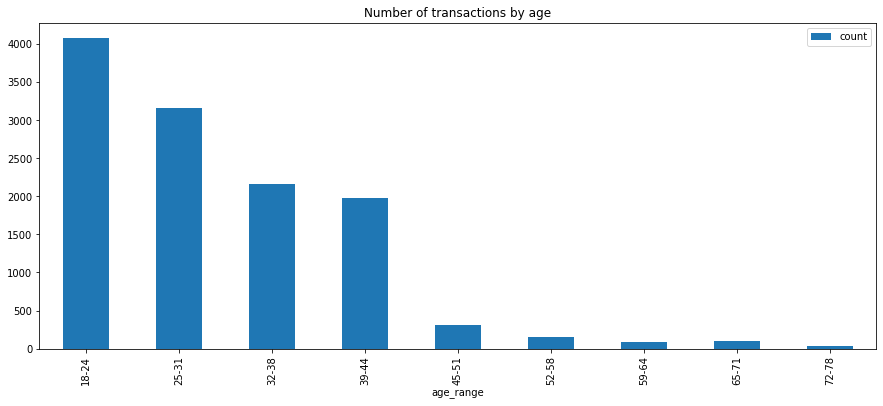

In [16]:

grouped_by_age.plot.bar(x = 'age_range', y = 'count', title = "Number of transactions by age", figsize = (15, 6))
plt.show()

Active range of age of customers doing transaction is between 18-31.

# Salary wise analysis

In [17]:
salary_trans = df[df['txn_description'] == 'PAY/SALARY']

male_salary = salary_trans[salary_trans['gender'] == 'M']

female_salary = salary_trans[salary_trans['gender'] == 'F']

In [18]:
average_salary = salary_trans['amount'].values.mean()

average_salary = average_salary.round(decimals = 2)

average_salary

1898.73

In [19]:
average_male_salary = male_salary['amount'].values.mean()

average_male_salary = average_male_salary.round(decimals = 2)

average_male_salary

2096.81

In [20]:
average_female_salary = female_salary['amount'].values.mean()

average_female_salary = average_female_salary.round(decimals = 2)

average_female_salary

1679.37

In [21]:
salary_location = salary_trans.groupby('merchant_suburb').size().to_frame('count').reset_index()
salary_location

,merchant_suburb,count
0,Melbourne,883


This means that all the salaried people are from Melbourne who are doing transactions.

In [22]:
gender_salary = salary_trans.groupby('gender').size().to_frame('count').reset_index()

gender_salary = gender_salary.sort_values('count', ascending = False)

gender_salary

,gender,count
1,M,464
0,F,419


Male salaried people are more than female salaried people.

In [23]:
salary_trans['age_range'] = salary_trans['age'].apply(get_range, args=(age_bins,))

salary_by_age = salary_trans.groupby('age_range').size().to_frame('count').reset_index()

salary_by_age

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age_range,count
0,18-24,286
1,25-31,182
2,32-38,166
3,39-44,158
4,45-51,32
5,52-58,20
6,59-64,13
7,65-71,14
8,72-78,12


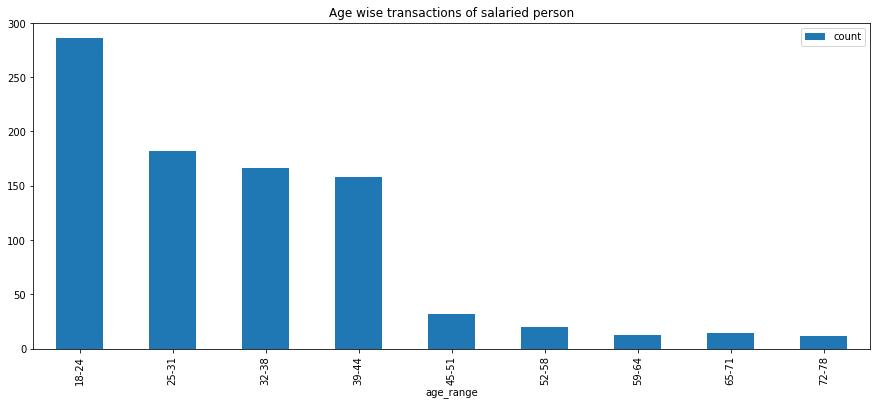

In [24]:
salary_by_age.plot.bar(x = 'age_range', y = 'count', title = "Age wise transactions of salaried person", figsize = (15, 6))
plt.show()

Salaried person between age range 18 to 24 are more active in making transactions.

In [25]:
salary_bins = np.linspace(salary_trans['amount'].values.min(), salary_trans['amount'].values.max(), 10)

salary_range_bins = generate_range_bins(salary_bins)

salary_trans['salary_range'] = salary_trans['amount'].apply(get_range, args=(salary_bins,))

grouped_by_salary = salary_trans.groupby('salary_range').size().to_frame('count').reset_index()

grouped_by_salary

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,salary_range,count
0,1494-2411,216
1,2412-3329,154
2,3330-4247,77
3,4248-5164,16
4,5165-6082,2
5,576-1493,412
6,6083-7000,2
7,8835+,4


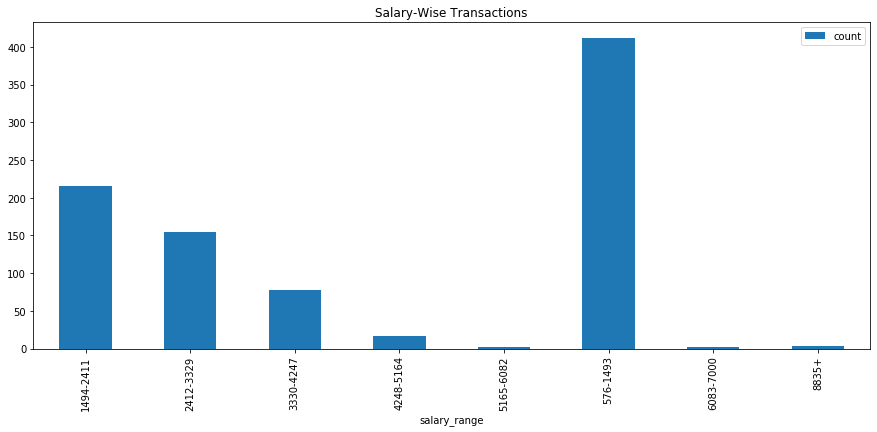

In [26]:
grouped_by_salary.plot.bar(x = 'salary_range', y = 'count', title = "Salary-Wise Transactions", figsize = (15, 6))
plt.show()

Highest number of transactions are done by person with salary range in between 576-1493.

# Top 5 customers

In [27]:
grouped_by_cust = df.groupby(['first_name','account']).size().to_frame('count').reset_index()

top_5_cust = grouped_by_cust.reset_index(drop = True).sort_values('count', ascending=False).head(5)

top_5_cust

,first_name,account,count
21,Diana,ACC-1598451071,577
62,Michael,ACC-1222300524,303
96,Tonya,ACC-182446574,292
47,Kimberly,ACC-4258502723,260
75,Rhonda,ACC-1037050564,259


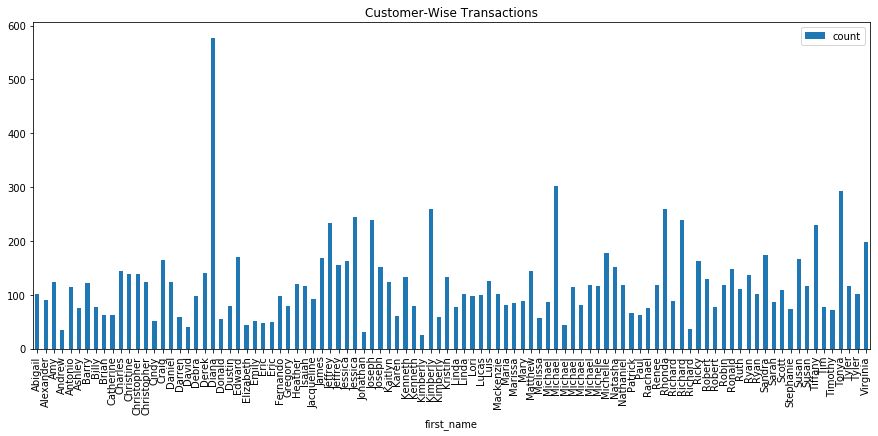

In [28]:
grouped_by_cust.plot.bar(x = 'first_name', y = 'count', title = "Customer-Wise Transactions", figsize = (15, 6))
plt.show()

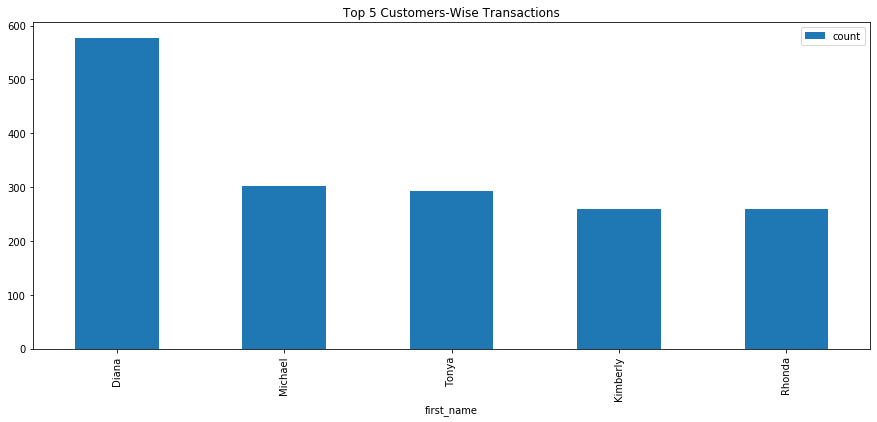

In [29]:
top_5_cust.plot.bar(x = 'first_name', y = 'count', title = "Top 5 Customers-Wise Transactions", figsize = (15, 6))
plt.show()

Most active customer is Diana followed by Michael, Tonya.

In [30]:
print("Top States of the top 5 customers where they have shopped in:")
account = top_5_cust['account']
for acc in account:
    customer = df[df['account'] == acc]
    grouped_by_state = customer.groupby('merchant_state').size().to_frame('count').reset_index()
    most_number_of_trans = grouped_by_state.reset_index(drop=True).sort_values('count', ascending=False).head(1)
    print("The customer {} has shopped in {} a number of {} times.".format(customer['first_name'].iloc[0], most_number_of_trans['merchant_state'].iloc[0], most_number_of_trans['count'].iloc[0]))

Top States of the top 5 customers where they have shopped in:
The customer Diana has shopped in QLD a number of 443 times.
The customer Michael has shopped in NSW a number of 254 times.
The customer Tonya has shopped in WA a number of 191 times.
The customer Kimberly has shopped in VIC a number of 173 times.
The customer Rhonda has shopped in QLD a number of 185 times.


# Monthly analysis

In [31]:
# storing month of dates in month column
df['month'] = df['date'].dt.month

# storing day of date in day column
df['day of week'] = df['date'].dt.dayofweek

# whether day is weekend
df['weekend'] = np.where(df['day of week'].isin([6, 5]), 1, 0)
                         
df.head()

,status,account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,movement,age_range,month,day of week,weekend
1,authorized,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,debit,25-31,8,2,0
2,authorized,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,debit,32-38,8,2,0
3,authorized,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,debit,39-44,8,2,0
4,authorized,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,debit,25-31,8,2,0
5,posted,ACC-1608363396,PAYMENT,Robert,1705.43,2018-08-01,M,20,Melbourne,NSW,2018-08-01T02:00:00.000+0000,163.00,debit,18-24,8,2,0


In [32]:
# converting day of week in week names
def days(x):
    if x == 0:
        return 'Monday'
    if x == 1:
        return 'Tuesday'
    if x == 2:
        return 'Wednesday'
    if x == 3:
        return 'Thursday'
    if x == 4:
        return 'Friday'
    if x == 5:
        return 'Saturday'
    if x == 6:
        return 'Sunday'
df['day of week'] = df['day of week'].apply(days)

df.head()

,status,account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,movement,age_range,month,day of week,weekend
1,authorized,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,debit,25-31,8,Wednesday,0
2,authorized,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,debit,32-38,8,Wednesday,0
3,authorized,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,debit,39-44,8,Wednesday,0
4,authorized,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,debit,25-31,8,Wednesday,0
5,posted,ACC-1608363396,PAYMENT,Robert,1705.43,2018-08-01,M,20,Melbourne,NSW,2018-08-01T02:00:00.000+0000,163.00,debit,18-24,8,Wednesday,0


In [33]:
monthly = df.groupby('month').size().to_frame('count')

monthly = monthly.sort_values('count', ascending = False).reset_index()

monthly

,month,count
0,10,4087
1,9,4013
2,8,3942


In [34]:
avg_tran_per_month = monthly['count'].sum() // len(monthly['count'])

avg_tran_per_month

4014

Number of Transactions per month : 4014

In [35]:
monthly_amount = df.groupby('month')[['amount']].sum()

monthly_amount = monthly_amount.sort_values('amount', ascending = False).reset_index()

monthly_amount

,month,amount
0,10,802798.47
1,9,730550.21
2,8,729919.27


In [36]:
# avg transactions customers do each month
month_avg = monthly_amount['amount'].sum() / len(monthly_amount['amount'])

month_avg = month_avg.round(decimals = 2)

month_avg

754422.65

Amount of transaction per month : 754422.65 AUD

In [37]:
customer = df.groupby('account').size().to_frame('count')

customer = customer.sort_values('count', ascending = False).reset_index()

customer

,account,count
0,ACC-1598451071,577
1,ACC-1222300524,303
2,ACC-182446574,292
3,ACC-4258502723,260
4,ACC-1037050564,259
...,...,...
95,ACC-1998563091,40
96,ACC-3881031190,37
97,ACC-721712940,34
98,ACC-4059612845,31


Maximum number of the transactions are done by customer with account number ACC-1598451071 followed by customers with account number ACC-1222300524, ACC-182446574, ACC-4258502723.

In [38]:
avg_trans_per_cust = customer['count'].sum() // len(customer['count'])

avg_trans_per_cust

120

Number of transactions per customer : 120

In [39]:
customer = df.groupby('account')[['amount']].sum()

customer = customer.sort_values('amount', ascending = False).reset_index()

customer

,account,amount
0,ACC-3317636250,45409.16
1,ACC-1496451953,42688.30
2,ACC-1523339231,40215.54
3,ACC-2231965366,37943.79
4,ACC-240804743,36786.13
...,...,...
95,ACC-53508546,11438.37
96,ACC-721712940,10845.25
97,ACC-1217063613,10652.72
98,ACC-559365433,10587.42


Maximum amount of transactions done by customer with account number ACC-3317636250 followed by customers with account number ACC-1496451953, ACC-1523339231, ACC-2231965366, ACC-240804743.

In [40]:
amount_per_cust = customer['amount'].sum() / len(customer['amount'])

amount_per_cust = amount_per_cust.round(decimals = 2)

amount_per_cust

22632.68

Amount of transaction per customer = 22632.68 AUD

In [41]:
weekly = df.groupby('day of week').size().to_frame('count')

weekly = weekly.sort_values('count', ascending = False).reset_index()

weekly

,day of week,count
0,Friday,2073
1,Wednesday,2062
2,Thursday,1801
3,Saturday,1709
4,Sunday,1550
5,Tuesday,1487
6,Monday,1360


In [42]:
weekly_trans_number = weekly['count'].sum() // len(weekly['count'])

weekly_trans_number

1720

Number of transactions per week = 1720

In [43]:
weekly = df.groupby('day of week')[['amount']].sum()

weekly = weekly.sort_values('amount', ascending = False).reset_index()

weekly

,day of week,amount
0,Friday,516909.84
1,Monday,507580.56
2,Wednesday,402713.47
3,Thursday,331402.77
4,Tuesday,329484.19
5,Saturday,93002.56
6,Sunday,82174.56


In [44]:
weekly_trans_amount = weekly['amount'].sum() / len(weekly['amount'])

weekly_trans_amount = weekly_trans_amount.round(decimals = 2)

weekly_trans_amount

323323.99

Amount of transactions per week : 323323.99 AUD

In [45]:
group = df.groupby('date').size().to_frame('count')

group = group.sort_values('count', ascending = False).reset_index()

group

,date,count
0,2018-09-28,174
1,2018-08-17,172
2,2018-10-05,168
3,2018-10-17,162
4,2018-09-14,161
...,...,...
86,2018-08-06,99
87,2018-08-20,97
88,2018-10-23,96
89,2018-10-08,95


Most of the transactions are done on 28 sept 2018 followed by dates 17 august 2018 and 5 october 2018.

# Visualization using charts
Let us first categorize among categorical and numerical columns since we have added some columns recently.
We will use bar plot for categorical and violin plot for numerical data.

In [46]:
categorical_col = df.select_dtypes(exclude=np.number).columns.tolist()

numeric_col = df.select_dtypes(include=np.number).columns.tolist()

print("categorical columns : ", categorical_col)
print("numerical columns : ", numeric_col)

categorical columns :  ['status', 'account', 'txn_description', 'first_name', 'date', 'gender', 'merchant_suburb', 'merchant_state', 'extraction', 'movement', 'age_range', 'day of week']
numerical columns :  ['balance', 'age', 'amount', 'month', 'weekend']


# Bar plot for some categorical columns before treating outliers

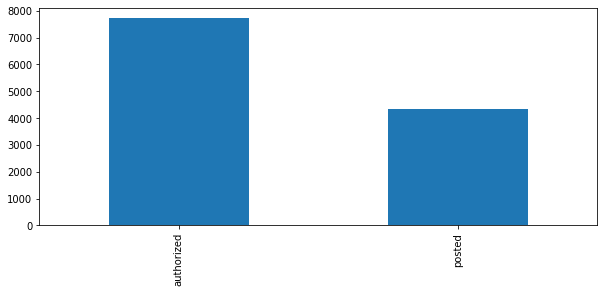

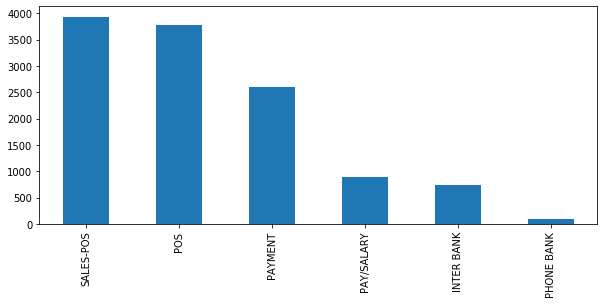

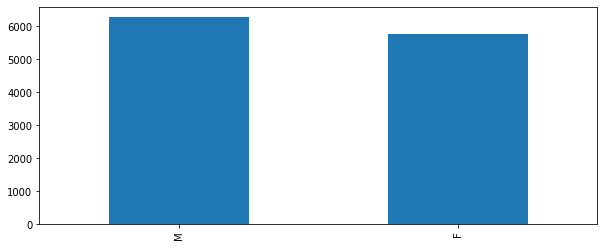

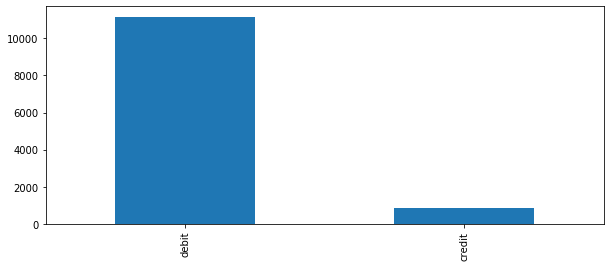

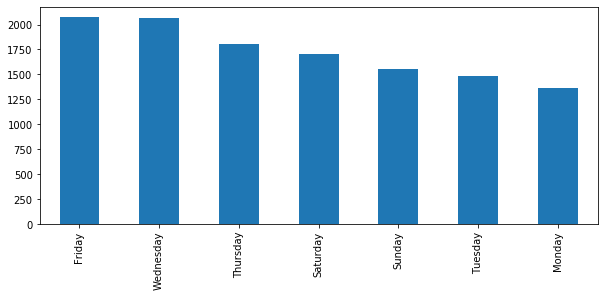

In [47]:
required_colm = ['status', 'txn_description', 'gender', 'movement', 'day of week']
for col in required_colm:
    plt.figure(figsize = (10, 4))
    df[col].value_counts().plot(kind = 'bar')
    plt.show()

# Violin plot for numerical columns

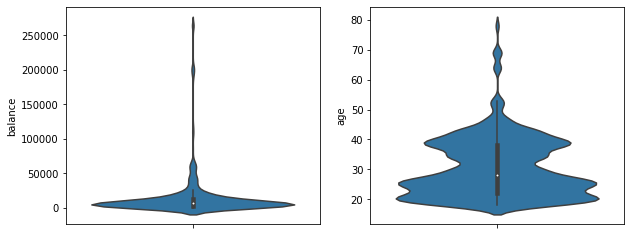

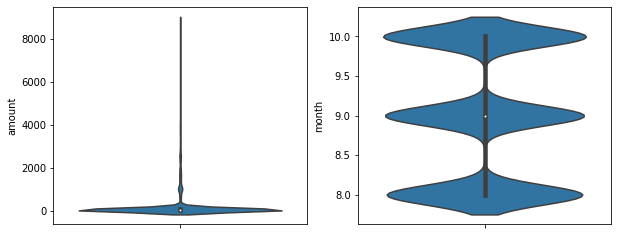

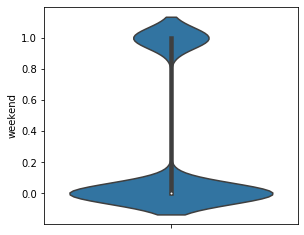

In [48]:
for i in range(0, len(numeric_col), 2):
    plt.figure(figsize = (10, 4))
    plt.subplot(121)
    sns.violinplot(y = df[numeric_col[i]])
    if i != len(numeric_col)-1:
        plt.subplot(122)
        sns.violinplot(y = df[numeric_col[i+1]])

# Conclusions
1. Transaction period of dataset is 1 August 2018 to 31 October 2018 (92 days). But the entries in data are for 91 days. That is transaction record of one day is missing which turned out to be 16 August 2018.
2. Average transaction amount is 187.95 AUD
3. Average balance amount is 14705.41 AUD
4. Average age of customer is 30.58
5. Most of the transactions done by customers are from state NSW followed by VIC, QLD, WA and suburb area Melbourne followed by sydney. This areas have highest customers.
6. There are some areas with low transaction rate : ACT, TAS, NT, SA
7. Active range of age of customers doing transaction is between 18-31.
8. All the salaried people are from melbourne who are doing transactions.
9. Male salaried people are more than female salaried people.
10. Salaried person between age range 18 to 24 are more active in making transactions.
11. Highest number of transactions are done by person with salary range in between 576-1493 AUD.
12. Top 5 customers in making transactions are : Diana, Michael, Tonya, Kimberly and Rhonda
13. Most active customer among top 5 customers is Diana followed by Michael, Tonya.
14. Top States of the top 5 customers where they have shopped in:
      1. The customer Diana has shopped in QLD a number of 443 times.
      2. The customer Michael has shopped in NSW a number of 254 times.
      3. The customer Tonya has shopped in WA a number of 191 times.
      4. The customer Kimberly has shopped in VIC a number of 173 times.
      5. The customer Rhonda has shopped in QLD a number of 185 times.
15. Number of Transactions per month : 4014
16. Amount of Transaction per month : 754422.65 AUD
17. Maximum number of the transactions are done by customer with account number ACC-1598451071 followed by customers with account number ACC-1222300524, ACC-182446574, ACC-4258502723.
18. Maximum amount of transactions done by customer with account number ACC-3317636250 followed by customers with account number ACC-1496451953, ACC-1523339231, ACC-2231965366, ACC-240804743.
19. Number of transactions per customer : 120
20. Amount of transaction per customer : 22632.68 AUD
21. Number of transactions per week : 1720
22. Amount of transaction per week : 323323.99 AUD
23. Most of the transactions are done on 28 sept 2018 followed by dates 17 august 2018 and 5 october 2018.
24. Maximum number of transactions are authorized.
25. Maximum number of transactions are SALE POSE transactions.
26. Gender distribution is nearly same but there are little more transactions by male customers.
27. Maximum number of transactions are done for debit.
28. Maximum number of transactions are done on friday followed by wednesday.
29. Balance amount of customers lie mostly below 25000 AUD.
30. October month has maximum number of transactions.
31. Maximum number of transactions are done on weekends.